# Proyecto 1

**Tema:** Predicción de enfermedades Cardíacas



|     Nombres      |      Apellidos       |     Login     |  Codigo   |
| :--------------: | :------------------: | :-----------: | :-------: |
|     Santiago     | Gonzalez Montealegre | s.gonzalez35  | 202012274 |
| Juliana Carolina |  Cardenas Barragan   | jc.cardenasb1 | 202011683 |


## Análisis Exploratorio de Datos
### Análisis Multivariado

## Summary

Tenemos dos grupos de variables: las numéricas y las categóricas. Además, una variable _target_ a estudiar.


### Variables Numéricas

- Edad (age)
- Presión Arterial en Reposo (trestbps)
- Colesterol Sérico (chol)
- Frecuencia Cardiaca Máxima (thalach)
- Depresion del ST Inducida por Ejercicio en Relación con Reposo (oldpeak)

### Variables Categóricas

- Sexo (sex)
- Tipo de Dolor en Pecho (cp)
- Azucar en Sange en Ayunas (fbs)
- Resultados Electrocardiográficos en Reposo (restecg)
- Angina Inducida por Ejercicio (exang)
- Pendiente Segmento ST de Ejercicio Máximo (slope)
- Número de Vasos Principales coloreados por Fluoroscopia (ca)
- Thalassemia (thal)
- Presencia de Enfermedad Cardiaca (heartdis)

## Librerías Requeridas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Carga de Datos

In [18]:
columnas = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

df = pd.read_csv("../../Data/processed.cleveland.data", names=columnas)

df.age = df.age.astype(int)
df.sex = df.sex.astype(int)
df.cp = df.cp.astype(int)
df.trestbps = df.trestbps.astype(int)
df.chol = df.chol.astype(int)
df.fbs = df.fbs.astype(int)
df.restecg = df.restecg.astype(int)
df.thalach = df.thalach.astype(int)
df.exang = df.exang.astype(int)
df.slope = df.slope.astype(int)

# ------------
# Null values
# ------------

df['caNull'] = df['ca']
df.loc[df['caNull'] == '?', 'ca'] = float(df.ca.mode()[0])
df.loc[df['caNull'] != '?', 'ca'] = df['ca']
df['ca'] = pd.to_numeric(df['ca']).astype('int32')

df['thalNull'] = df['thal']
df.loc[df['thalNull'] == '?', 'thal'] = float(df.thal.mode()[0])
df.loc[df['thalNull'] != '?', 'thal'] = df['thal']
df['thal'] = pd.to_numeric(df['thal']).astype('int32')

# ------------
# Target
# ------------

df.loc[df['num'] == 0, 'heartdis'] = 0
df.loc[df['num'] != 0, 'heartdis'] = 1
df.heartdis = df.heartdis.astype(int)

# ------------
# Drop columns
# ------------
df.drop(['num', 'caNull', 'thalNull'], axis=1, inplace=True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heartdis
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


## Categorical vs. Categorical

### sex

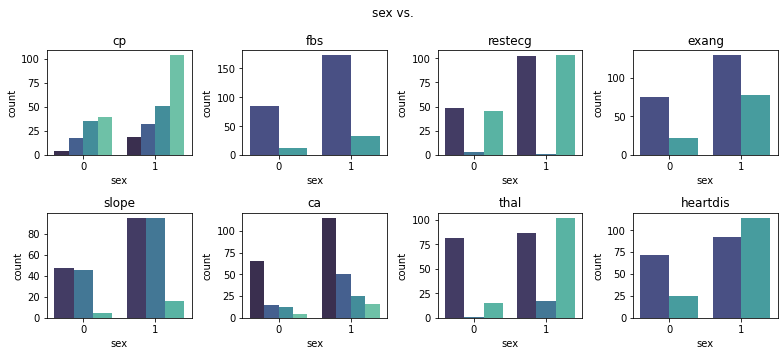

In [13]:
categoria = 'sex'
categorical = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'heartdis']

comparar = categorical.copy()
comparar.remove(categoria)

data = df[categorical].copy()

largo = len(data)

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(11, 5))

for ax, column in zip(axes.flatten(), comparar):
    sns.countplot(data=data, x=categoria, hue=column, ax=ax, palette='mako')
    ax.set_title(f'{column}')
    ax.legend().set_visible(False)
    
fig.suptitle(f'{categoria} vs.')

plt.tight_layout()
plt.show()

### cp

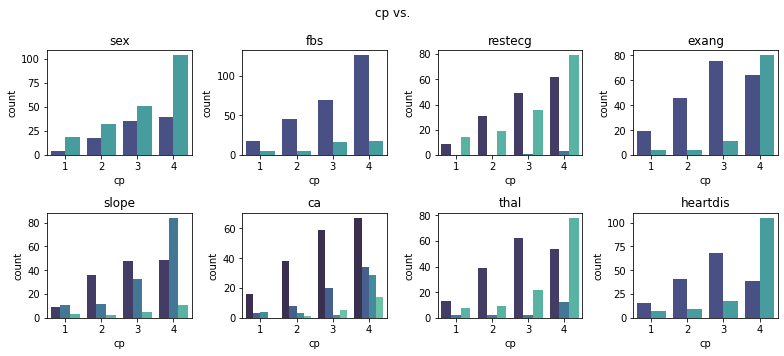

In [14]:
categoria = 'cp'
categorical = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'heartdis']

comparar = categorical.copy()
comparar.remove(categoria)

data = df[categorical].copy()

largo = len(data)

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(11, 5))

for ax, column in zip(axes.flatten(), comparar):
    sns.countplot(data=data, x=categoria, hue=column, ax=ax, palette='mako')
    ax.set_title(f'{column}')
    ax.legend().set_visible(False)
    
fig.suptitle(f'{categoria} vs.')

plt.tight_layout()
plt.show()

### fbs

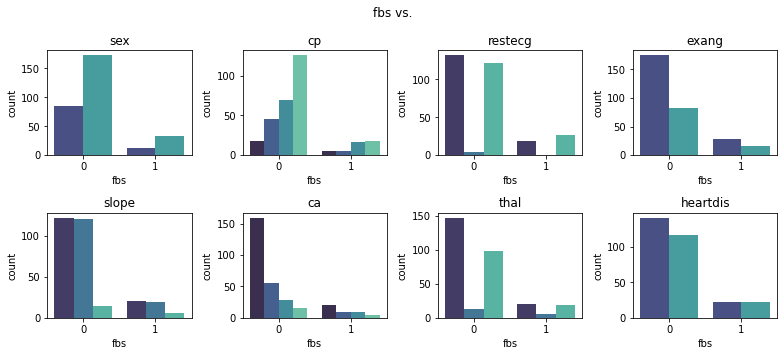

In [15]:
categoria = 'fbs'
categorical = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'heartdis']

comparar = categorical.copy()
comparar.remove(categoria)

data = df[categorical].copy()

largo = len(data)

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(11, 5))

for ax, column in zip(axes.flatten(), comparar):
    sns.countplot(data=data, x=categoria, hue=column, ax=ax, palette='mako')
    ax.set_title(f'{column}')
    ax.legend().set_visible(False)
    
fig.suptitle(f'{categoria} vs.')

plt.tight_layout()
plt.show()

### restecg

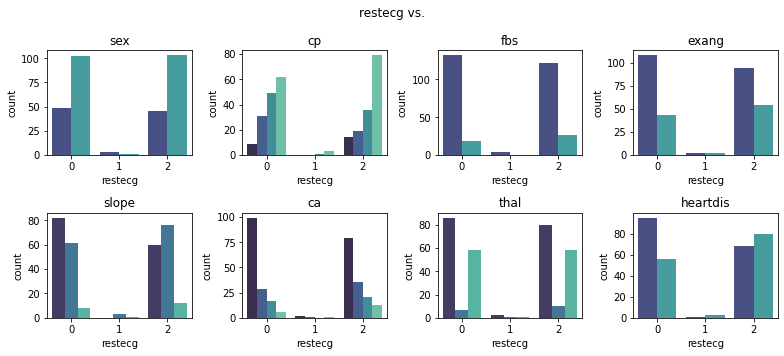

In [16]:
categoria = 'restecg'
categorical = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'heartdis']

comparar = categorical.copy()
comparar.remove(categoria)

data = df[categorical].copy()

largo = len(data)

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(11, 5))

for ax, column in zip(axes.flatten(), comparar):
    sns.countplot(data=data, x=categoria, hue=column, ax=ax, palette='mako')
    ax.set_title(f'{column}')
    ax.legend().set_visible(False)
    
fig.suptitle(f'{categoria} vs.')

plt.tight_layout()
plt.show()

### exang

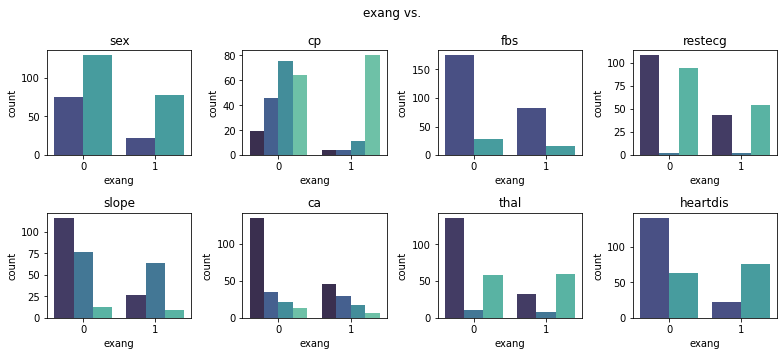

In [17]:
categoria = 'exang'
categorical = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'heartdis']

comparar = categorical.copy()
comparar.remove(categoria)

data = df[categorical].copy()

largo = len(data)

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(11, 5))

for ax, column in zip(axes.flatten(), comparar):
    sns.countplot(data=data, x=categoria, hue=column, ax=ax, palette='mako')
    ax.set_title(f'{column}')
    ax.legend().set_visible(False)
    
fig.suptitle(f'{categoria} vs.')

plt.tight_layout()
plt.show()

### slope

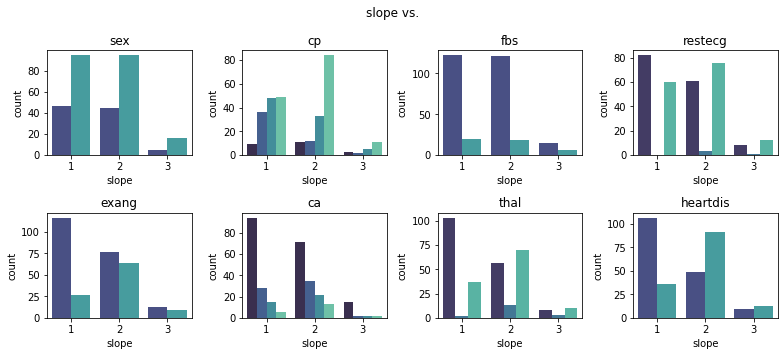

In [18]:
categoria = 'slope'
categorical = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'heartdis']

comparar = categorical.copy()
comparar.remove(categoria)

data = df[categorical].copy()

largo = len(data)

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(11, 5))

for ax, column in zip(axes.flatten(), comparar):
    sns.countplot(data=data, x=categoria, hue=column, ax=ax, palette='mako')
    ax.set_title(f'{column}')
    ax.legend().set_visible(False)
    
fig.suptitle(f'{categoria} vs.')

plt.tight_layout()
plt.show()

### ca

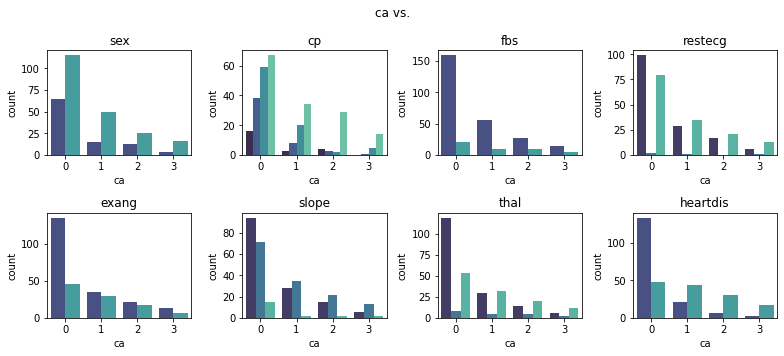

In [19]:
categoria = 'ca'
categorical = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'heartdis']

comparar = categorical.copy()
comparar.remove(categoria)

data = df[categorical].copy()

largo = len(data)

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(11, 5))

for ax, column in zip(axes.flatten(), comparar):
    sns.countplot(data=data, x=categoria, hue=column, ax=ax, palette='mako')
    ax.set_title(f'{column}')
    ax.legend().set_visible(False)
    
fig.suptitle(f'{categoria} vs.')

plt.tight_layout()
plt.show()

### thal

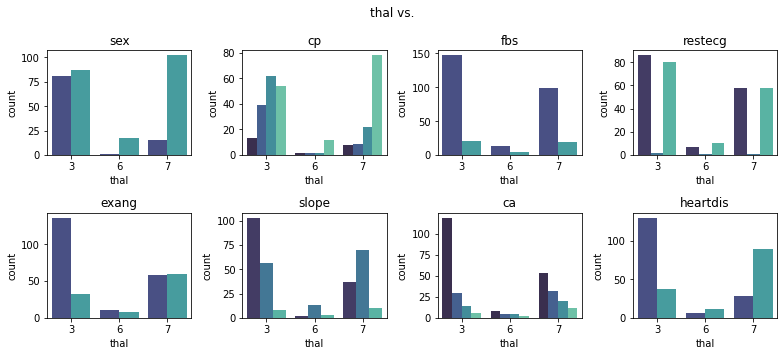

In [20]:
categoria = 'thal'
categorical = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'heartdis']

comparar = categorical.copy()
comparar.remove(categoria)

data = df[categorical].copy()

largo = len(data)

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(11, 5))

for ax, column in zip(axes.flatten(), comparar):
    sns.countplot(data=data, x=categoria, hue=column, ax=ax, palette='mako')
    ax.set_title(f'{column}')
    ax.legend().set_visible(False)
    
fig.suptitle(f'{categoria} vs.')

plt.tight_layout()
plt.show()

### heartdis

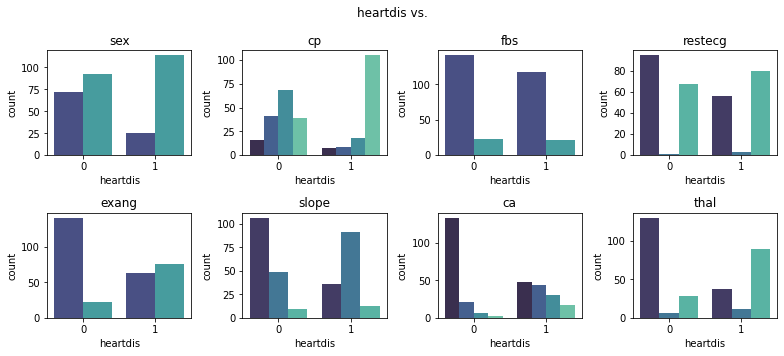

In [21]:
categoria = 'heartdis'
categorical = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'heartdis']

comparar = categorical.copy()
comparar.remove(categoria)

data = df[categorical].copy()

largo = len(data)

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(11, 5))

for ax, column in zip(axes.flatten(), comparar):
    sns.countplot(data=data, x=categoria, hue=column, ax=ax, palette='mako')
    ax.set_title(f'{column}')
    ax.legend().set_visible(False)
    
fig.suptitle(f'{categoria} vs.')

plt.tight_layout()
plt.show()

## Categorical vs. Numerical

### sex

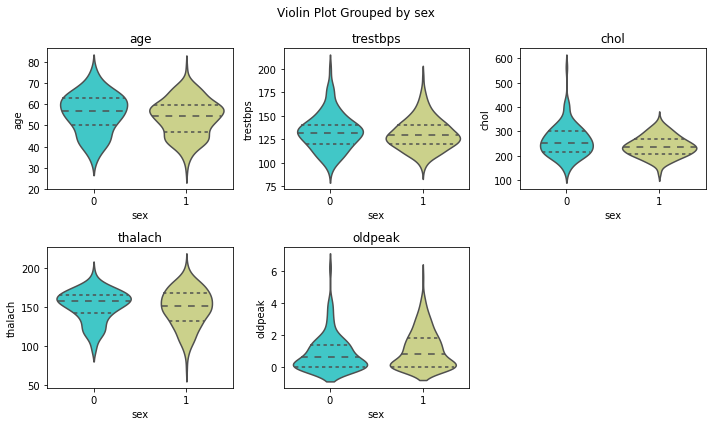

In [22]:
numerical = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical = ['sex']
total = numerical + categorical

data = df[total].copy()

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))

for ax, column in zip(axes.flatten(), data.columns):
    if column == data.columns[-1]:
        ax.set_visible(False)
        continue
    sns.violinplot(data=data, x=data.columns[-1], y=column, ax=ax, palette='rainbow', inner='quartile')
    ax.set_title(column)
    
fig.subplots_adjust(hspace=0.7, wspace=0.3)
fig.suptitle(f'Violin Plot Grouped by {categorical[0]}')

plt.tight_layout()
plt.show()

### cp

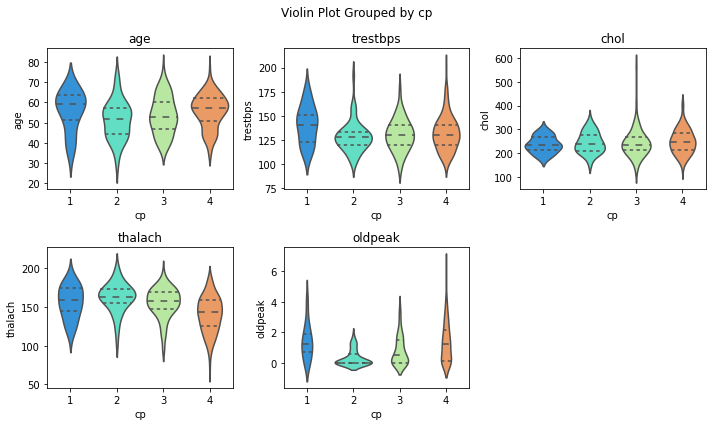

In [23]:
numerical = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical = ['cp']
total = numerical + categorical

data = df[total].copy()

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))

for ax, column in zip(axes.flatten(), data.columns):
    if column == data.columns[-1]:
        ax.set_visible(False)
        continue
    sns.violinplot(data=data, x=data.columns[-1], y=column, ax=ax, palette='rainbow', inner='quartile')
    ax.set_title(column)
    
fig.subplots_adjust(hspace=0.7, wspace=0.3)
fig.suptitle(f'Violin Plot Grouped by {categorical[0]}')

plt.tight_layout()
plt.show()

### fbs

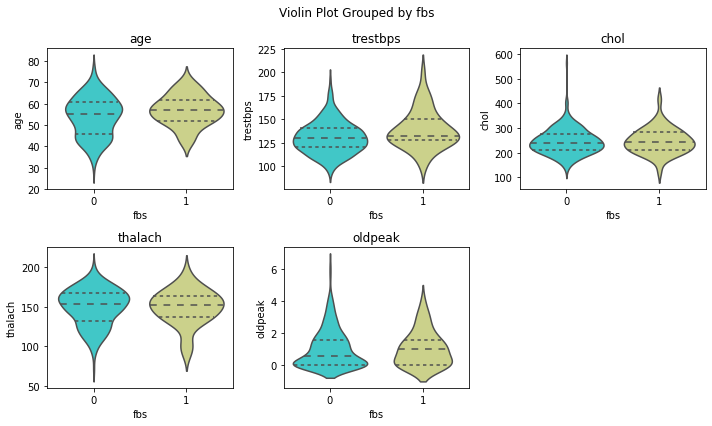

In [24]:
numerical = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical = ['fbs']
total = numerical + categorical

data = df[total].copy()

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))

for ax, column in zip(axes.flatten(), data.columns):
    if column == data.columns[-1]:
        ax.set_visible(False)
        continue
    sns.violinplot(data=data, x=data.columns[-1], y=column, ax=ax, palette='rainbow', inner='quartile')
    ax.set_title(column)
    
fig.subplots_adjust(hspace=0.7, wspace=0.3)
fig.suptitle(f'Violin Plot Grouped by {categorical[0]}')

plt.tight_layout()
plt.show()

### restecg

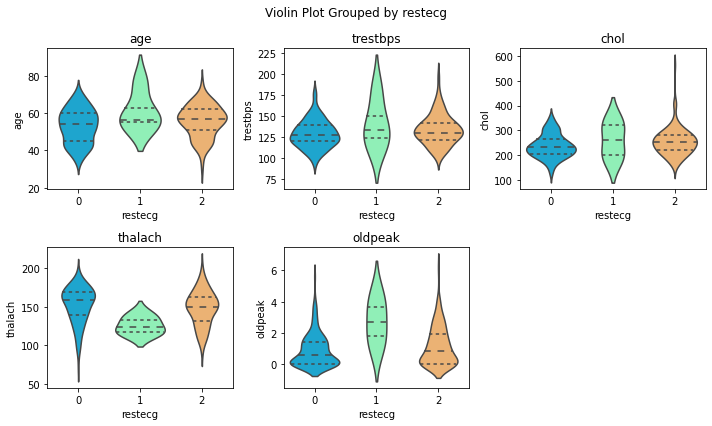

In [25]:
numerical = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical = ['restecg']
total = numerical + categorical

data = df[total].copy()

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))

for ax, column in zip(axes.flatten(), data.columns):
    if column == data.columns[-1]:
        ax.set_visible(False)
        continue
    sns.violinplot(data=data, x=data.columns[-1], y=column, ax=ax, palette='rainbow', inner='quartile')
    ax.set_title(column)
    
fig.subplots_adjust(hspace=0.7, wspace=0.3)
fig.suptitle(f'Violin Plot Grouped by {categorical[0]}')

plt.tight_layout()
plt.show()

### exang

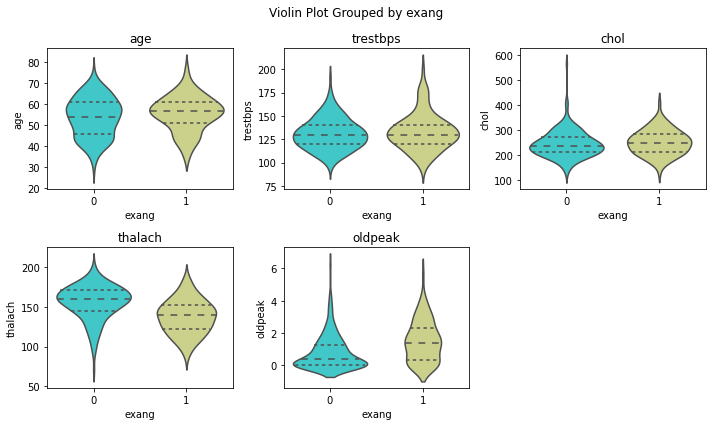

In [26]:
numerical = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical = ['exang']
total = numerical + categorical

data = df[total].copy()

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))

for ax, column in zip(axes.flatten(), data.columns):
    if column == data.columns[-1]:
        ax.set_visible(False)
        continue
    sns.violinplot(data=data, x=data.columns[-1], y=column, ax=ax, palette='rainbow', inner='quartile')
    ax.set_title(column)
    
fig.subplots_adjust(hspace=0.7, wspace=0.3)
fig.suptitle(f'Violin Plot Grouped by {categorical[0]}')

plt.tight_layout()
plt.show()

### slope

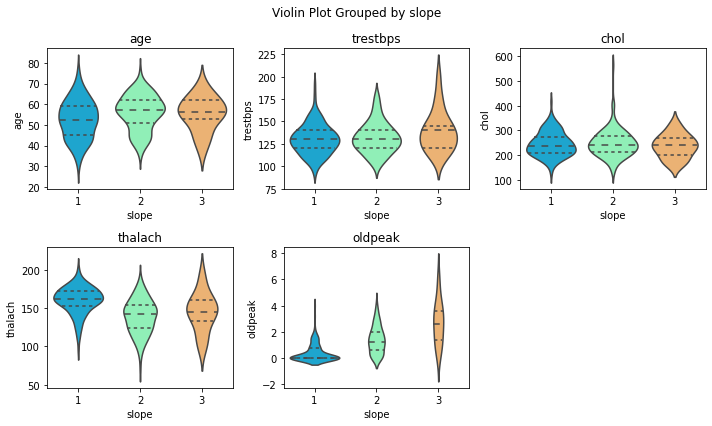

In [27]:
numerical = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical = ['slope']
total = numerical + categorical

data = df[total].copy()

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))

for ax, column in zip(axes.flatten(), data.columns):
    if column == data.columns[-1]:
        ax.set_visible(False)
        continue
    sns.violinplot(data=data, x=data.columns[-1], y=column, ax=ax, palette='rainbow', inner='quartile')
    ax.set_title(column)
    
fig.subplots_adjust(hspace=0.7, wspace=0.3)
fig.suptitle(f'Violin Plot Grouped by {categorical[0]}')

plt.tight_layout()
plt.show()

### ca

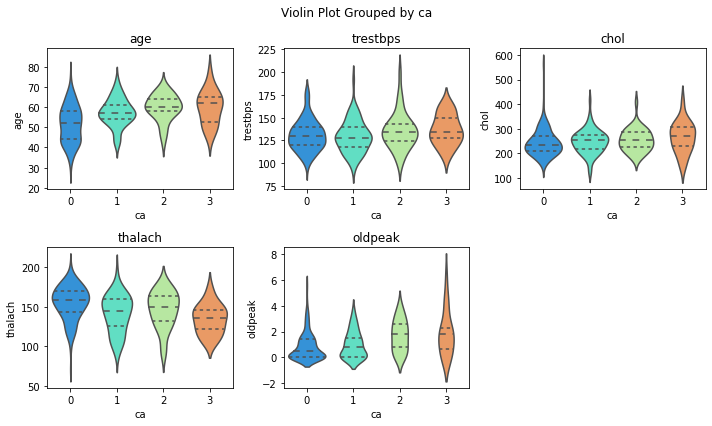

In [28]:
numerical = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical = ['ca']
total = numerical + categorical

data = df[total].copy()

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))

for ax, column in zip(axes.flatten(), data.columns):
    if column == data.columns[-1]:
        ax.set_visible(False)
        continue
    sns.violinplot(data=data, x=data.columns[-1], y=column, ax=ax, palette='rainbow', inner='quartile')
    ax.set_title(column)
    
fig.subplots_adjust(hspace=0.7, wspace=0.3)
fig.suptitle(f'Violin Plot Grouped by {categorical[0]}')

plt.tight_layout()
plt.show()

### thal

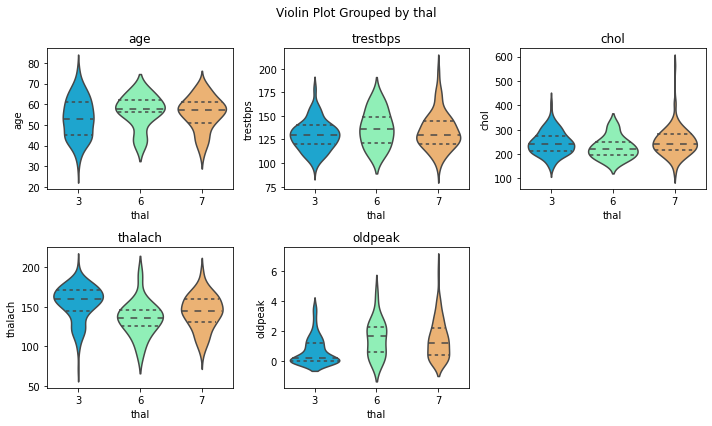

In [29]:
numerical = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical = ['thal']
total = numerical + categorical

data = df[total].copy()

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))

for ax, column in zip(axes.flatten(), data.columns):
    if column == data.columns[-1]:
        ax.set_visible(False)
        continue
    sns.violinplot(data=data, x=data.columns[-1], y=column, ax=ax, palette='rainbow', inner='quartile')
    ax.set_title(column)
    
fig.subplots_adjust(hspace=0.7, wspace=0.3)
fig.suptitle(f'Violin Plot Grouped by {categorical[0]}')

plt.tight_layout()
plt.show()

### heartdis

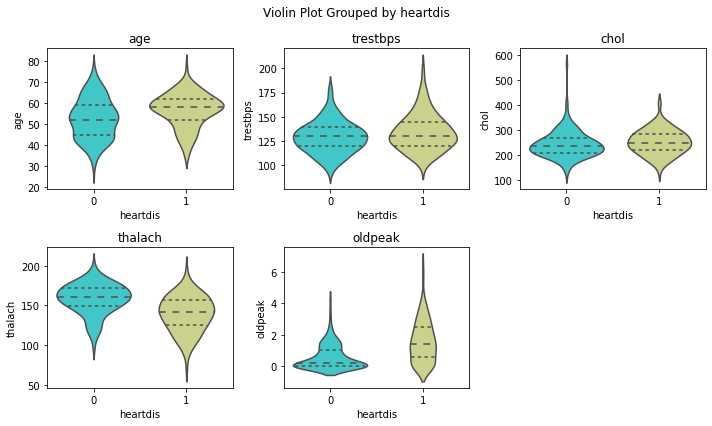

In [30]:
numerical = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical = ['heartdis']
total = numerical + categorical

data = df[total].copy()

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))

for ax, column in zip(axes.flatten(), data.columns):
    if column == data.columns[-1]:
        ax.set_visible(False)
        continue
    sns.violinplot(data=data, x=data.columns[-1], y=column, ax=ax, palette='rainbow', inner='quartile')
    ax.set_title(column)
    
fig.subplots_adjust(hspace=0.7, wspace=0.3)
fig.suptitle(f'Violin Plot Grouped by {categorical[0]}')

plt.tight_layout()
plt.show()

## Numerical vs. Numerical

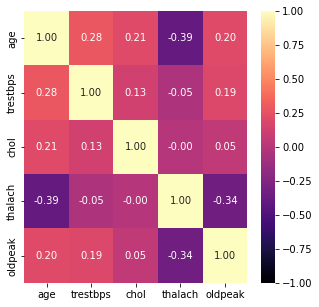

In [31]:
numerical = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

data = df[numerical].copy()

plt.figure(figsize=(5, 5))
sns.heatmap(data.corr(), annot=True, cmap="magma", fmt='.2f', vmin=-1, vmax=1)
plt.show()

In [32]:
numerical = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

data = df[numerical].copy()

fig = px.scatter_matrix(data, dimensions=['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], opacity=0.7)
fig.update_traces(diagonal_visible=False)
fig.update_traces(marker=dict(size=3.5))
fig.update_layout(title='Scatter Matrix Numerical Variables')

fig.show()